In [1]:
import pandas as pd
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import re

In [2]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')
data.head()
data.info()
#dashboard_df = pd.read_csv(p_file, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')


/Users/arielnabeth/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   event_time     object
 1   event_type     object
 2   product_id     int64 
 3   category_id    int64 
 4   category_code  object
 5   brand          object
 6   price          object
 7   user_id        int64 
 8   user_session   object
dtypes: int64(3), object(6)
memory usage: 318.3+ MB


In [3]:

data = data.loc[data['user_id'].isin([203531121, 562076640])]
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
6,2019-11-01 00:00:25 UTC,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
12,2019-11-01 00:00:50 UTC,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
15,2019-11-01 00:00:57 UTC,view,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
53,2019-11-01 00:03:44 UTC,cart,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
55,2019-11-01 00:03:46 UTC,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
56,2019-11-01 00:03:54 UTC,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
80,2019-11-01 00:05:02 UTC,view,5896424,1487580006300255120,NaN,jessnail,32.54,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
31270,2019-11-01 09:21:54 UTC,view,5895424,2154396123597373922,NaN,levrana,7.94,203531121,6f673fc9-aee4-437b-aabd-03a0f01127a5
31398,2019-11-01 09:23:01 UTC,view,5895425,2154396123597373922,NaN,levrana,7.94,203531121,6f673fc9-aee4-437b-aabd-03a0f01127a5


In [4]:
data = data[data['user_session'].notnull()]

In [5]:
data['event_time'] = data['event_time'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data.info()

ValueError: unconverted data remains:  UTC


**סעיף 1**

In [6]:
data = data.sort_values(['user_session', 'event_time'], ascending=[True, True])
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].diff(-1).dt.total_seconds().fillna(0)
data.loc[data.groupby('user_session').tail(1).index, 'duration_to_next_event'] = 0
data['duration_to_next_event'] = data['duration_to_next_event'].abs()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**סעיף 2**

In [7]:
data = data.sort_values(['user_id', 'event_time'], ascending=[True, True])
data['diff_for_funnel'] = data.groupby('user_id')['event_time'].diff()
data['funnel_number'] = (data['diff_for_funnel'] > pd.Timedelta(days=5)).groupby(data['user_id']).cumsum()
data['funnel_number'] = data['funnel_number'].fillna(0) + 1

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**סעיף 3**

In [8]:
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['user_session'].transform('nunique')

KeyError: 'funnel_number'

**סעיף 4**

In [9]:
data_with_letter_in_price = data[data['price'].str.contains(r'[^\d.]', na=False)]
data_with_letter_in_price['price'] = data_with_letter_in_price['price'].str.extract(r'(\d+\.?\d*)', expand=False)
data.update(data_with_letter_in_price)
data['price'] = data['price'].astype(float)

**סעיף 5**

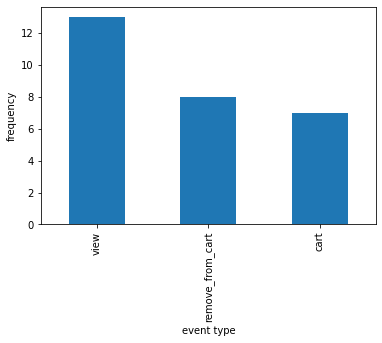

In [18]:
data['event_type'].value_counts().plot(kind='bar', xlabel='event type', ylabel='frequency')
plt.show()

**סעיף 6**

In [19]:
#CREATE A NEW DATAFRAME
session_data = data.loc[:, ['user_id', 'user_session', 'funnel_number','index_in_funnel']].drop_duplicates()


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['funnel_number', 'index_in_funnel'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [20]:
#COUNT num of event for session
datacounts = data.groupby('user_session')['event_time'].count()
session_data ['num_of_event'] = session_data ['user_session'].map(datacounts)

NameError: name 'session_data' is not defined

In [21]:
#TIME of event for session
datatime = data.groupby('user_session')['event_time'].apply(lambda x: x.max() - x.min())
session_data ['connection_time'] = session_data ['user_session'].map(datatime)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [22]:
#PRODUCT ID view for session
view_products_list = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].agg(list)
session_data['list_of_viewed'] = session_data ['user_session'].map(view_products_list)

NameError: name 'session_data' is not defined

In [23]:
#PRODUCT ID cart for session
cart_products_list = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].agg(list)
session_data['list_of_added_to_cart'] = session_data ['user_session'].map(cart_products_list)

NameError: name 'session_data' is not defined

In [24]:
#PRODUCT ID purchase for session
purchases_products_list = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].agg(list)
session_data['list_of_purchased'] = session_data ['user_session'].map(purchases_products_list)

NameError: name 'session_data' is not defined

In [25]:
session_data

NameError: name 'session_data' is not defined